# 在线性回归模型中使用梯度下降法

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("..")

In [14]:
np.random.seed(666)
x=2*np.random.random(size=100)
y=x*3.+4.+np.random.normal(size=100)

In [15]:
X=x.reshape(-1,1)

In [16]:
X.shape

(100, 1)

In [17]:
y.shape

(100,)

<function matplotlib.pyplot.show(close=None, block=None)>

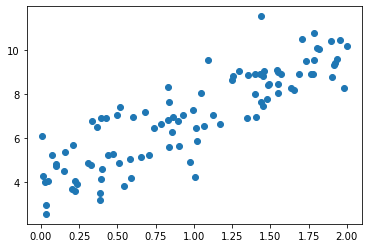

In [18]:
plt.scatter(x,y)
plt.show

### 使用梯度下降法训练

In [19]:
def J(theta,X_b,y):
    try:
        return np.sum((y-X_b.dot(theta))**2)/len(X_b)
    except:
        return float('inf')

In [20]:
def dJ(theta,X_b,y):
    res=np.empty(len(theta))
    res[0]=np.sum(X_b.dot(theta)-y)
    for i in range(1,len(theta)):
        res[i]=np.sum((X_b.dot(theta)-y).dot(X_b[:,i]))
    return res*2/len(X_b)

In [22]:
def gradient_descent(X_b,y,initial_theta,eta,n_iters=1e4,epsilon=1e-8):
    theta=initial_theta
    i_iter=0
    
    while i_iter<n_iters:
        gradient=dJ(theta,X_b,y)
        last_theta=theta
        theta=theta-eta*gradient
        
        if(abs(J(theta,X_b,y)-J(last_theta,X_b,y))<epsilon):
            break
        
        i_iter+=1
    
    return theta


In [27]:
X_b=np.hstack([np.ones((len(X),1)),X])
initial_theta=np.zeros(X_b.shape[1])
eta=0.01

theta=gradient_descent(X_b,y,initial_theta,eta)

In [26]:
theta

array([4.02145786, 3.00706277])

### 封装我们的线性回归算法

In [28]:
from playML.LinearRegression import LinearRegression

In [29]:
lin_reg=LinearRegression()
lin_reg.fit_gd(X,y)

LinearRegression()

In [30]:
lin_reg.coef_

array([3.00706277])

In [31]:
lin_reg.intercept_

4.021457858204859